In [1]:
# package import

import os
import numpy as np
from scipy.io import loadmat
import matplotlib as mpl
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import itertools
import math
import sklearn as sk
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
import seaborn as sns
from scipy import stats
import pickle as pkl
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
import scipy as sp


# set wd

os.chdir("\\Users\\madel\\Documents\\Grad School\\Classes\\Fall 2020\\ECE532\\Final Project")
os.getcwd() # sets wd
#os.listdir(os.getcwd()) # lists files in wd

'C:\\Users\\madel\\Documents\\Grad School\\Classes\\Fall 2020\\ECE532\\Final Project'

In [2]:
# import data
reddf = pd.read_csv("winequality-red.csv",delimiter=';')
whitedf = pd.read_csv("winequality-white.csv",delimiter=';')

# add color label
reddf['color'] = str('red')
whitedf['color']=str('white')
    
# stack df's 
fulldf = pd.concat([reddf, whitedf], ignore_index=True)
#fulldf.head()
#fulldf.tail()

In [5]:
# remove color for data formatting
trimdf = fulldf.drop('color',axis=1)

In [7]:
# scale and transform the data

# scaling will help with regularization
# each parameter will be scaled between 0 and 1
X=trimdf
scaler = MinMaxScaler() 
scaler.fit(X)
scaleddf=pd.DataFrame(scaler.transform(X))
y=trimdf['quality'].reset_index(drop=True)

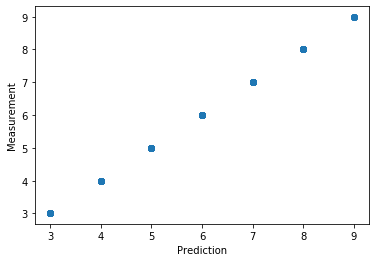

In [8]:
#Try simple linear regression to test that data is correctly formatted (Should look like a line)
trainingdata=X
clf = linear_model.LinearRegression(fit_intercept=False) #This defines the form of the model you are trying to fit (linear_model) and the optimization method (none for now)
clf.fit(trainingdata,y) 
prediction=clf.predict(trainingdata) 
plt.scatter(prediction,y) 
plt.xlabel('Prediction')
plt.ylabel('Measurement')
plt.show()
plt.close()

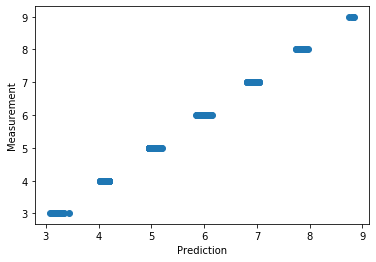

In [9]:
#Try lasso with high alpha to test that data is correctly formatted (should look like a bit noisier line)
trainingdata=X
clf = linear_model.Lasso(alpha=0.1,fit_intercept=False,max_iter=100000)
clf.fit(trainingdata,y) 
prediction=clf.predict(trainingdata)
plt.scatter(prediction,y) 
plt.xlabel('Prediction')
plt.ylabel('Measurement')
plt.show()
plt.close()

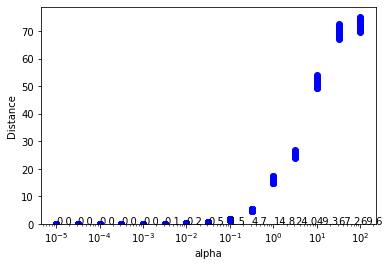

In [14]:
#Find the best lambda for lasso regression by doing cross validation
alphas=np.logspace(-5,2,15)
for a in alphas:
    distances=[]
    for k in range(30): 
        trainingdata=X.sample(frac=0.9, random_state=k).sort_index() 
        testdata=X.drop(trainingdata.index) 
        clf = linear_model.Lasso(alpha=a,fit_intercept=False,max_iter=100000) 
        clf.fit(trainingdata,y.drop(testdata.index)) 
        prediction=clf.predict(testdata) 
        dist=np.linalg.norm(prediction-y.drop(trainingdata.index))
        plt.plot(a,dist,'bo') 
        distances.append(dist)
    plt.text(a,0,'%.1f' % min(distances))
plt.xlabel('alpha')
plt.ylabel('Distance')
plt.xscale('log')
plt.ylim(bottom=0)
#plt.savefig()
plt.show()
plt.close()

y=1.1015650763357276x+-0.4793564773849388, r=0.7129814922488293, p=0.0, n=6497


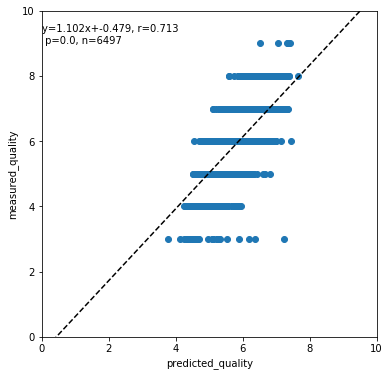

In [17]:
# Try with a lambda somewhere in the middle
# Did not expect the distance to converge to zero
plt.figure(figsize=(6,6))
alpha=alphas[10] 

#Here the training data and the test data are the same, so your plot is just showing how well the model fits your data
trainingdata=X
testdata=X
clf = linear_model.Lasso(alpha=alpha,fit_intercept=False,max_iter=10000) #Create model object
clf.fit(trainingdata,y) 
prediction=clf.predict(testdata) 
m,slope,r,p,stderr=sp.stats.linregress(prediction,y)
print('y='+str(m)+'x+'+str(slope)+', r='+str(r)+', p='+str(p)+', n='+str(len(prediction)))
plt.plot(prediction,y,linestyle='',marker='o')
z=np.linspace(0,7500,100)
plt.plot(z,m*z+slope,linestyle='dashed',color='k')
plt.xlim(0,10)
plt.ylim(0,10)
plt.xlabel('predicted_quality')
plt.ylabel('measured_quality')
plt.annotate('y='+str(np.round(m,3))+'x+'+str(np.round(slope,3))+', r='+str(np.round(r,3))+'\n p='+str(p)+', n='+str(len(prediction)),(0,.90), xycoords='axes fraction')
# plt.savefig()
plt.show()
plt.close()

y=1.0573564591927995x+-0.3233982044246728, r=0.9987278401883706, p=0.0, n=6497


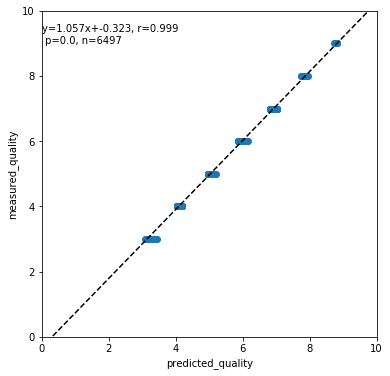

In [18]:
# Try with a lambda slightly lower
# Did not expect the distance to converge to zero
plt.figure(figsize=(6,6))
alpha=alphas[8] 

#Here the training data and the test data are the same, so your plot is just showing how well the model fits your data
trainingdata=X
testdata=X
clf = linear_model.Lasso(alpha=alpha,fit_intercept=False,max_iter=10000) #Create model object
clf.fit(trainingdata,y) 
prediction=clf.predict(testdata) 
m,slope,r,p,stderr=sp.stats.linregress(prediction,y)
print('y='+str(m)+'x+'+str(slope)+', r='+str(r)+', p='+str(p)+', n='+str(len(prediction)))
plt.plot(prediction,y,linestyle='',marker='o')
z=np.linspace(0,7500,100)
plt.plot(z,m*z+slope,linestyle='dashed',color='k')
plt.xlim(0,10)
plt.ylim(0,10)
plt.xlabel('predicted_quality')
plt.ylabel('measured_quality')
plt.annotate('y='+str(np.round(m,3))+'x+'+str(np.round(slope,3))+', r='+str(np.round(r,3))+'\n p='+str(p)+', n='+str(len(prediction)),(0,.90), xycoords='axes fraction')
# plt.savefig()
plt.show()
plt.close()